<a href="https://colab.research.google.com/github/Nkalubo/The-2024-Pediatric-Sepsis-Challenge/blob/main/model1_auc73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
url='https://raw.githubusercontent.com/Kamaleswaran-Lab/The-2024-Pediatric-Sepsis-Challenge/refs/heads/main/SyntheticData_Training.csv'
df=pd.read_csv(url)


1.26.4


In [ ]:
print(sns.__version__)

0.13.2


**Subsetting**

In [ ]:
df=df.dropna(subset=['momagefirstpreg_adm'])

In [ ]:
age_bins=[0,12,36,60,np.inf] # Use np.inf to represent infinity
age_labels=['infant','toddler','preschool','schoolgoing']
df['agecat']=pd.cut(df['agecalc_adm'],bins=age_bins,labels=age_labels)

In [ ]:
sc=['height_cm_adm','muac_mm_adm','agecalc_adm','glucose_mmolpl_adm','lengthadm','rr_brpm_app_adm','weight_kg_adm','diasbp_mmhg_adm','sqi1_perc_oxi_adm','bcsverbal_adm','temp_c_adm','lactate_mmolpl_adm','hematocrit_gpdl_adm','bcsmotor_adm','sysbp_mmhg_adm','inhospital_mortality','agecat']

In [ ]:
df=df[sc]

In [ ]:
muac_bins=[0,115,125,np.inf]
muac_labels=['sam','mam','normal']
df['muac_cat']=pd.cut(df['muac_mm_adm'],bins=muac_bins,labels=muac_labels)

In [ ]:
LabelEncoder()
le=LabelEncoder()

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'inhospital_mortality'] # Exclude target variable

In [ ]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df['agecat']=le.fit_transform(df['agecat'])

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,38.0,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,42.0,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,40.0,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,NaN,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,42.0,0,107.0,0,3,1


In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='median')

In [ ]:
df['agecat'] = le.fit_transform(df['agecat'])

df['bcsmotor_adm']=le.fit_transform(df['bcsmotor_adm'])
df['hematocrit_gpdl_adm']=le.fit_transform(df['hematocrit_gpdl_adm'])
df['bcsverbal_adm']=le.fit_transform(df['bcsverbal_adm'])

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x.head()
x.info()
print(x.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 2462 entries, 0 to 2685
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height_cm_adm        2451 non-null   float64
 1   muac_mm_adm          2451 non-null   float64
 2   agecalc_adm          2462 non-null   float64
 3   glucose_mmolpl_adm   2454 non-null   float64
 4   lengthadm            2462 non-null   int64  
 5   rr_brpm_app_adm      2458 non-null   float64
 6   weight_kg_adm        2455 non-null   float64
 7   diasbp_mmhg_adm      2462 non-null   float64
 8   sqi1_perc_oxi_adm    2344 non-null   float64
 9   bcsverbal_adm        2462 non-null   int64  
 10  temp_c_adm           2462 non-null   float64
 11  lactate_mmolpl_adm   2047 non-null   float64
 12  hematocrit_gpdl_adm  2462 non-null   int64  
 13  bcsmotor_adm         2462 non-null   int64  
 14  sysbp_mmhg_adm       2460 non-null   float64
 15  agecat               2462 non-null   int64 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

#scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)
StandardScaler()
x_train=scaler.fit_transform(x_train)
scaler.transform(x_test)
x_train_scaled=scaler.transform(x_train)
x=x_train_scaled

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

#roc with the k features

**Subsetting DF real** ***bold text***

#**Subsetting** **DF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature data and 'y' is the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
selected_columns = ['inhospital_mortality','height_cm_adm','weight_kg_adm','glucose_mmolpl_adm','hr_bpm_adm','hematocrit_gpdl_adm','lactate_mmolpl_adm','temp_c_adm','spo2site1_pc_oxi_adm','bcsverbal_adm','bcsmotor_adm','agecat']

In [ ]:
selected_columns = df

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,31,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,35,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,33,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,55,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,35,0,107.0,0,3,1


In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x=selected_columns

In [ ]:
y=df['inhospital_mortality']

# New Section

In [ ]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,31,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,35,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,33,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,55,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,35,0,107.0,0,3,1


#Nan counts

In [ ]:
columns_to_drop=['spo2other_adm','lactate2_mmolpl_adm','vaccmeaslessource_adm']

In [ ]:
df=df.dropna(subset=['lactate_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['hematocrit_gpdl_adm'])


In [ ]:
df=df.dropna(subset=['height_cm_adm'])

In [ ]:
df=df.dropna(subset=['weight_kg_adm'])

In [ ]:
df=df.dropna(subset=['rr_brpm_app_adm'])

In [ ]:
df=df.dropna(subset=['muac_mm_adm'])

In [ ]:
df=df.dropna(subset=['sysbp_mmhg_adm'])

In [ ]:
df=df.dropna(subset=['bcsverbal_adm'])

In [ ]:
df=df.dropna(subset=['diasbp_mmhg_adm'])


In [ ]:
df=df.dropna(subset=['temp_c_adm'])

In [ ]:
df=df.dropna(subset=['glucose_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['sqi1_perc_oxi_adm'])

In [ ]:
df=df.dropna(subset=['muac_cat'])

In [ ]:
df=df.dropna(subset=['lactate_mmolpl_adm'])

In [ ]:
df=df.dropna(subset=['hematocrit_gpdl_adm'])

#summmarises numerical columns

#replace those unchecked with 0 and Checked with 1

In [ ]:
df.replace('Unchecked', 0, inplace=True)

In [ ]:
df.replace('Checked', 1, inplace=True)

#Label encoder

In [ ]:
categorical_cols=df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("Categorical colums:", categorical_cols)

Categorical colums: []


In [ ]:
le = LabelEncoder()

# Select the categorical columns you want to encode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Label Encoding to each categorical column
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

#Subsetting df (the flexible part)

In [ ]:
x = df.drop('inhospital_mortality', axis=1)
y = df['inhospital_mortality']

In [ ]:
bestfeatures=SelectKBest(score_func=chi2,k=20)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=17. All the features will be returned.
  warnings.warn(


#Columns

#Checking for Nas before machine learning

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
y.shape

(1935,)

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(x_train)

SimpleImputer()

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Checking features

In [ ]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

#Feature selection Method 1 (CHi squared)

In [ ]:
bestfeatures=SelectKBest(score_func=chi2,k=20)
fit=bestfeatures.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=17. All the features will be returned.
  warnings.warn(


In [ ]:
selected_feature_indices = fit.get_support(indices=True)

In [ ]:
selected_feature_names = x.columns[selected_feature_indices]

In [ ]:
print(selected_feature_names)

Index(['height_cm_adm', 'muac_mm_adm', 'agecalc_adm', 'glucose_mmolpl_adm',
       'lengthadm', 'rr_brpm_app_adm', 'weight_kg_adm', 'diasbp_mmhg_adm',
       'sqi1_perc_oxi_adm', 'bcsverbal_adm', 'temp_c_adm',
       'lactate_mmolpl_adm', 'hematocrit_gpdl_adm', 'bcsmotor_adm',
       'sysbp_mmhg_adm', 'agecat', 'muac_cat'],
      dtype='object')


#Feature selection 2

In [ ]:
model= ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.06682544 0.05812976 0.07528719 0.07376084 0.06390499 0.08220232
 0.06319888 0.06092049 0.05838947 0.05789453 0.06207657 0.05522583
 0.06452104 0.05344056 0.06104052 0.02063566 0.02254592]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9560723514211886

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [ ]:
print(precision)

0.0


In [ ]:
print(recall)

0.0


In [ ]:
print(f1)

0.0


In [ ]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.0


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 0.9973045822102425


In [ ]:
y_train.shape

(1548,)

In [ ]:
y_train.head()

,inhospital_mortality
2092,0
1833,0
855,1
2323,0
2151,0


In [ ]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# ... your existing code ...

# Now you can use roc_auc_score
y_pred_proba = model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.7334905660377358


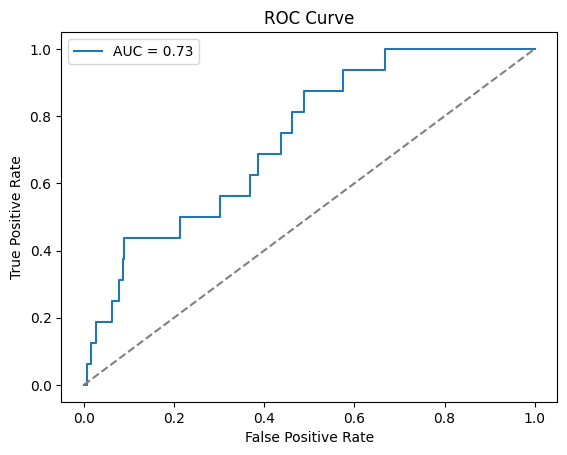

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()